# Analysis Seoul CCTV

## 1. 데이터 읽기

In [105]:
import pandas as pd

In [106]:
# pandas 설치되지 않았을 때
#!conda install -y pandas 

In [107]:
# 한글이 깨졌을 때 encoding = 'utf-8'
# ..은 상위폴더로 이동을 하라는 의미 source code 기준으로 한칸 올라가서 data 폴더에 들어가 데이터를 읽어와라의미
cctvSeoul = pd.read_csv('../data/01. Seoul_CCTV.csv', encoding = 'utf-8')

In [108]:
# 가장 상단에 있는 5개
#cctvSeoul.head(보고싶은 숫자만큼 입력)
cctvSeoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [109]:
# 내가 가진 전체 데이터를 볼 수 있음 
cctvSeoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [110]:
# 데이터프레임 컬럼명 보기
cctvSeoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [111]:
#가장 첫번째 컬럼명선택하는법
cctvSeoul.columns[0]

'기관명'

In [112]:
# 컬럼명바꾸기 inplace True는 변경내용을 원본에도 적용해라 의미
cctvSeoul.rename(columns={cctvSeoul.columns[0]:'구별'}, inplace=True)

In [113]:
cctvSeoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [3]:
#엑셀파일 읽어오기
# header옵션은 상단의 데이터를 지우겠다는 의미
# usecols 옵션은 엑셀에서 내가 원하는 컬럼만 가지고 오겠다는 의미
# 파이썬 가독성을 위해 
popSeoul = pd.read_excel(
    '../data/01. Seoul_Population.xls', header = 2, usecols="B, D, G, J, N"
)

In [4]:
# 상단에 있는 두개의 데이터는 필요가 없어보인다. 
# 엑셀파일을 건들 때는 원본 파일을 확인을 해야한다.
popSeoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [116]:
# 엑셀의 컬럼명 바꿔주기
popSeoul.rename(
    columns={popSeoul.columns[0]: '구별',
             popSeoul.columns[1]: '인구수',
             popSeoul.columns[2]: '한국인',
             popSeoul.columns[3]: '외국인',
             popSeoul.columns[4]: '고령자'},
    inplace = True
)

In [117]:
popSeoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


## CCTV 데이터 훑어보기

In [119]:
cctvSeoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [120]:
# 오름차순
cctvSeoul.sort_values(by='소계', ascending = True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [121]:
# 내림차순
cctvSeoul.sort_values(by='소계', ascending = False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [125]:
# 기존컬럼이없으면 추가 기존컬럼이 있으면 수정
cctvSeoul['최근증가율'] = (
    # 백분율로바꾼다.
    (cctvSeoul['2016년'] + cctvSeoul['2015년'] + cctvSeoul['2014년'])/cctvSeoul['2013년도 이전'] * 100
)
# 최근 3년간 시시티비증가율을 볼 수 있다. 
cctvSeoul.sort_values(by='최근증가율', ascending = False)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765
19,영등포구,1277,495,214,195,373,157.979798
0,강남구,3238,1292,430,584,932,150.619195
4,관악구,2109,846,260,390,613,149.290780
23,중구,1023,413,190,72,348,147.699758
11,동작구,1302,544,341,103,314,139.338235


## 3. 인구현황 데이터 홅어보기

In [128]:
popSeoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [129]:
popSeoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,520929,503297,17632,70046
22,서초구,445401,441102,4299,53205
23,강남구,561052,556164,4888,65060
24,송파구,671173,664496,6677,76582
25,강동구,440359,436223,4136,56161


In [130]:
popSeoul.drop([0], axis=0, inplace=True)

In [132]:
popSeoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [134]:
#unique() 한번이라도 등장했던것 중복없이 어떠한 데이터들이 한번이상 나타났는지 알 수 있다. 
popSeoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [135]:
# 전체 데이터 알기
len(popSeoul['구별'].unique())

25

In [136]:
#외국인 비율
popSeoul['외국인비율'] = (
    popSeoul['외국인']/popSeoul['인구수']*100
)


#고령자비율
popSeoul['고령자비율'] = (
    popSeoul['고령자']/popSeoul['인구수'] * 100
    
)

In [138]:
popSeoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [139]:
popSeoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [140]:
# 외국인 
popSeoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


In [142]:
# 외국인 
popSeoul.sort_values(by='외국인', ascending=True).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
9,강북구,328002,324479,3523,56530,1.074079,17.234651
11,노원구,558075,554403,3672,74243,0.657976,13.303409
15,양천구,475018,471154,3864,55234,0.813443,11.627770
25,강동구,440359,436223,4136,56161,0.939234,12.753458


In [141]:
# 고령자 
popSeoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [157]:
cctvSeoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [159]:
popSeoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [160]:
dataResult = pd.merge(cctvSeoul, popSeoul, on = '구별')

In [161]:
dataResult

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362
5,광진구,878,573,78,53,174,53.228621,372298,357703,14595,43953,3.920247,11.805865
6,구로구,1884,1142,173,246,323,64.973730,441559,410742,30817,58794,6.979135,13.315095
7,금천구,1348,674,51,269,354,100.000000,253491,235154,18337,34170,7.233787,13.479769
8,노원구,1566,542,57,451,516,188.929889,558075,554403,3672,74243,0.657976,13.303409
9,도봉구,825,238,159,42,386,246.638655,346234,344166,2068,53488,0.597284,15.448512


#### 년도별 데이터 삭제
- del
- drop

In [162]:
del dataResult['2013년도 이전']

In [163]:
dataResult.head()

,구별,소계,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [164]:
del dataResult['2014년']

In [165]:
dataResult.drop(['2015년', '2016년'], axis=1, inplace = True)
dataResult

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362
5,광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865
6,구로구,1884,64.973730,441559,410742,30817,58794,6.979135,13.315095
7,금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769
8,노원구,1566,188.929889,558075,554403,3672,74243,0.657976,13.303409
9,도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512


In [166]:
dataResult.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


### index 인덱스 변경
- set_index()
- 선택한 컬럼을 데이터 프레임 인덱스로 지정

In [167]:
dataResult.set_index("구별", inplace=True)
dataResult.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 상관계수보기
- pandas에서는 corr()
- corr() ---> correlation()
- 상관계수가 0.2이상인 데이터 비교

In [168]:
dataResult.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [169]:
dataResult.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     int64  
 3   한국인     25 non-null     int64  
 4   외국인     25 non-null     int64  
 5   고령자     25 non-null     int64  
 6   외국인비율   25 non-null     float64
 7   고령자비율   25 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.8+ KB


In [171]:
dataResult['CCTV비율'] = (dataResult['소계']/dataResult['인구수']) * 100
dataResult.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [173]:
# False 내림차순
dataResult.sort_values(by='CCTV비율', ascending = False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


In [174]:
# True  오름차순
dataResult.sort_values(by='CCTV비율', ascending = True).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


In [269]:
import matplotlib.pyplot as plt
from matplotlib import rc
# 주피터 노트북안에서 바로 나타나게해주는 코드이다.
%matplotlib inline
from matplotlib import font_manager
f_path = "C:/windows/Fonts/malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')
# 한글이 깨지는걸 방지하는 코드 
plt.rcParams['axes.unicode_minus'] = False #마이너스 부호 때문에 한글이 깨질 수가 있어 해주는 설정

In [271]:
dataResult.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


### 소계 컬럼 시각화

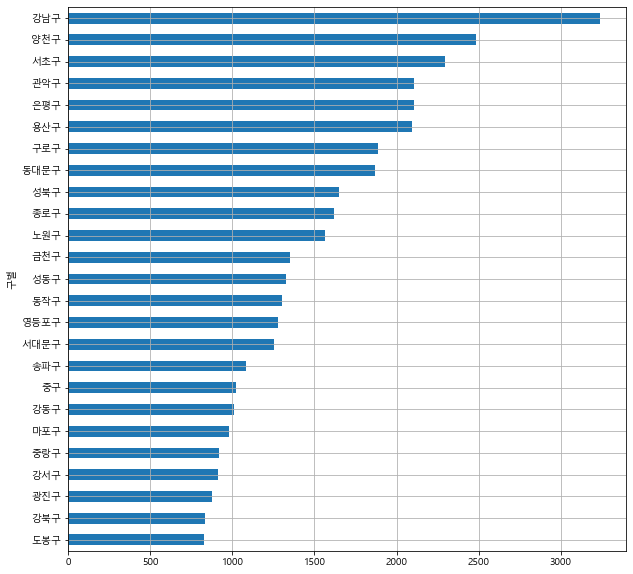

In [276]:
# pandas에도 matplotlib시각화 기능이있다.
#dataResult['소계'].plot(kind='barh', grid=True, figsize=(10, 10));
#한눈에 들어오지 않으니 정렬 후 시각화
dataResult['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10));

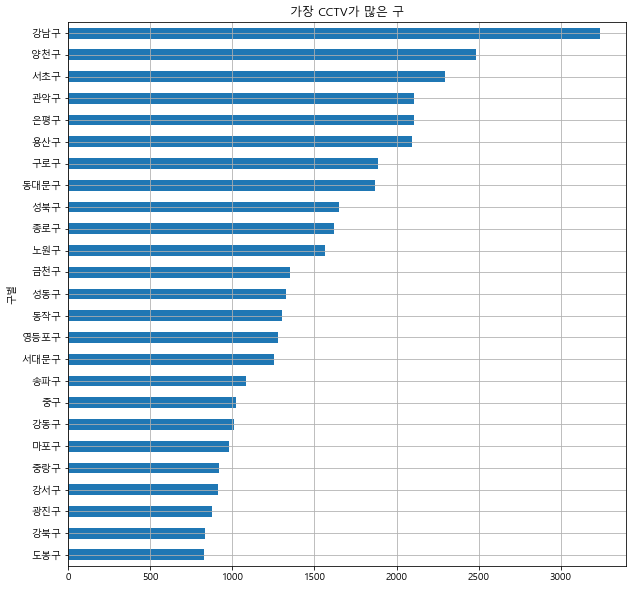

In [278]:
def drawGraph():
    dataResult['소계'].sort_values().plot(
        kind='barh', grid=True, title = '가장 CCTV가 많은 구', figsize=(10, 10)
    ); # python이 추구하는 가독성이 좋게 바꾸는것
drawGraph()

In [279]:
dataResult.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


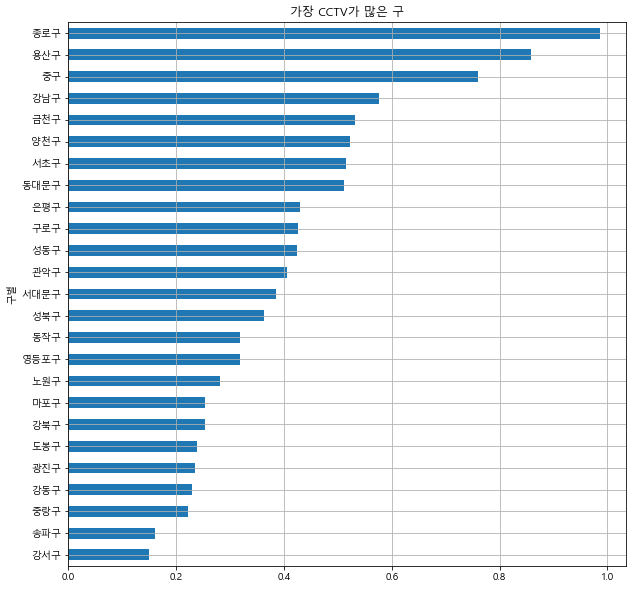

In [280]:
def drawGraph():
    dataResult['CCTV비율'].sort_values().plot(
        kind='barh', grid=True, title = '가장 CCTV가 많은 구', figsize=(10, 10)
    ); # python이 추구하는 가독성이 좋게 바꾸는것
drawGraph()

### 6. 데이터 경향 표시

In [281]:
dataResult.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


### 인구수와 소계 컬럼으로 scatter plot 그리기

In [287]:
def drwaGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(dataResult['인구수'], dataResult['소계'], s=50)
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.grid()
    plt.show()

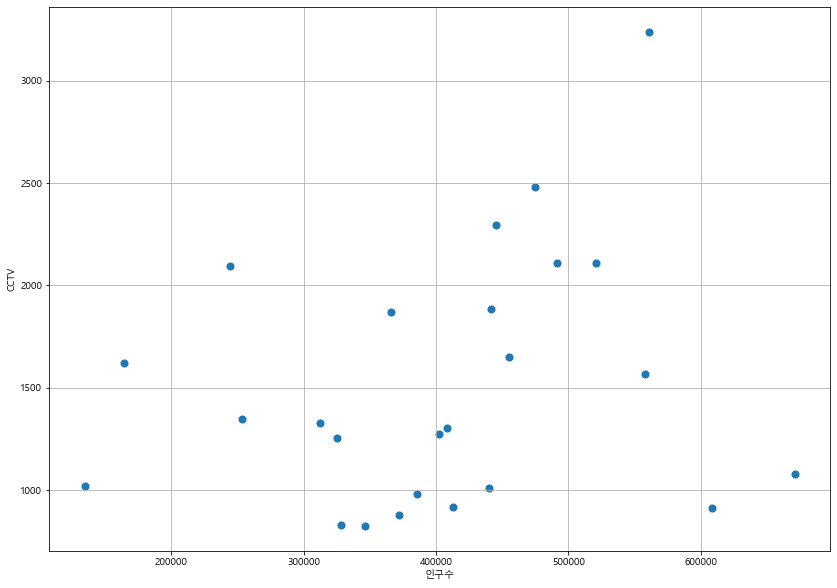

In [288]:
drwaGraph()

#### numpy를 이용한 1차직선 만들기 
- np.polyfit():직선을 구성하기 위한 계산
- np.polId(): polyfit으로 찾은 계수롤 파이썬에서 사용할 수 있는 함수로 만들어주는 기능

In [289]:
import numpy as np
fp1 = np.polyfit(dataResult['인구수'], dataResult['소계'],1)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [290]:
f1 = np.poly1d(fp1)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

In [292]:
# 인구가 40만인 구에서 서울시의 전체 경향에 맞는 적당한 cctv 수는?
f1(400000)

1509.7809252413338

In [293]:
fx = np.linspace(100000, 700000, 100)


- 경향선을 그리기위한 x데이터를 생성해주었다. 
- np.linspace(a, b, c) a부터 b까지의 c개의 등 간격 데이터 만큼 생성

In [294]:
def drwaGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(dataResult['인구수'], dataResult['소계'], s=50)
    #선이기 때문에 plot
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.grid()
    plt.show()

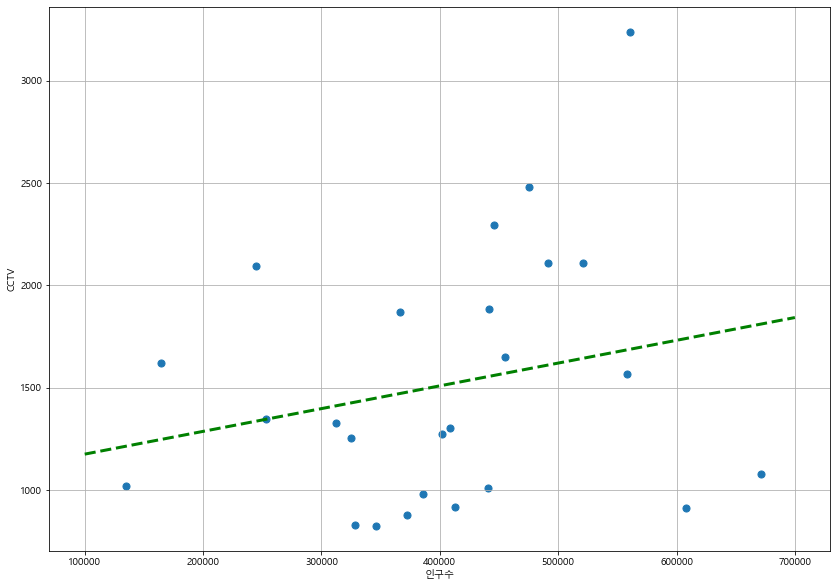

In [296]:
drwaGraph()

## 강조하고 싶은 데이터를 시각화해보자


### 그래프 다듬기
####경향과의 오차 만들기
- 경향(trend)과의 오차를 만들자
- 경향은 f1 함수에 해당 인구를 입력
- f1(dataResut['인구수'])


In [297]:
# x 데이터의 인구수 y데이터의 소계넣고 1차원 배열로 만들어준다.
fp1 = np.polyfit(dataResult['인구수'], dataResult['소계'], 1)
# 위에서 만든 변수를 함수기능으로 만들어준다.
f1 = np.poly1d(fp1)
fx= np.linspace(100000, 700000, 100)

# 오차 컬럼만들자            전체값     -       f1값에 넣어준 인구수를 빼줌
dataResult['오차'] = dataResult['소계'] - f1(dataResult['인구수'])

In [298]:
dataResult.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


In [301]:
# 경향과 비교해서 데이터 오차가 너무나는 데이터를 계산

df_sort_f = dataResult.sort_values(by='오차', ascending=False)#내림차순
df_sort_t = dataResult.sort_values(by='오차', ascending=True)# 오름차순

In [302]:
# 경향 대비 cctv를 가진 수
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [304]:
#경향 대비 cctv적게 가진 구 
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [307]:
from matplotlib.colors import ListedColormap
# colormap을 옵션을 줘야하는데 custom한것을 사용하고 싶어서 setting작업
color_map = ['#e74c3c', '#2ecc71', '#95a9a6', '#2ecc71', '#3498db', '#3498db']
my_cmap=ListedColormap(color_map)

In [328]:
def drwaGraph():
    plt.figure(figsize=(14, 10))
    # c옵션은 ~~ 어떤 기준으로 색을 구분을 할거고 색은 cmap에 있는 색을 줄것이다. 의미
    plt.scatter(dataResult['인구수'], dataResult['소계'], s=50, c = dataResult['오차'], cmap=my_cmap)
    #선이기 때문에 plot
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
    # 곱셈을 해주는 이유는 마커랑 텍스트랑 조금 떨어트려주기 위해서
    for n in range(5):
        #상위 5개
        plt.text(df_sort_f['인구수'][n]*1.02, # x좌표
                 df_sort_f['소계'][n] * 0.98,# y좌표
                df_sort_f.index[n],
                fontsize=15) # title
        #하위 5개
        plt.text(
            df_sort_t['인구수'][n]* 1.02,
            df_sort_t['소계'][n] * 0.98,
            df_sort_t.index[n],
            fontsize=15
        )
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.grid()
    plt.colorbar()
    plt.show()

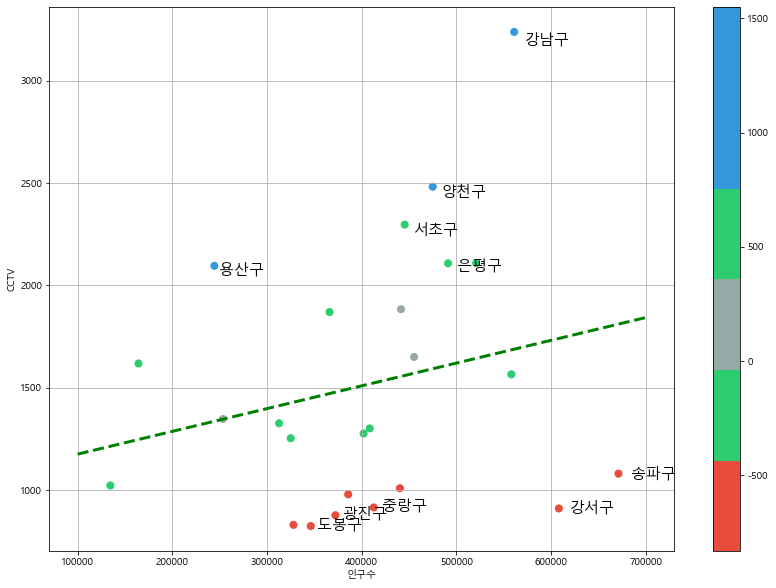

In [329]:
drwaGraph()

In [311]:
dataResult.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


In [313]:
# 소계와 인구수
dataResult['인구수'][0]

561052

In [314]:
dataResult['소계'][0]

3238

In [317]:
dataResult.index[0]

'강남구'

In [330]:
dataResult.to_csv('../data/01.CCTV_resut.csv', sep = ",", encoding='utf-8')

---

## Pandas 기초
- Python에서 R만큼 강력한 데이터 핸들링 성능을 제공하는 모듈 
- 단일 프로세스에서는 최대 효율
- 코딩이 가능하고 응용 가능한 엑셀로 받아드려도된다.
- 누군가는 스테로이드 맞은 엑셀로 표현한다.

### Series
- index와 value로 이루어져 있다.
- 한 가지 데이터 타입만 가질 수 있다.

In [1]:
import pandas as pd # pandas 모듈 
import numpy as np # numpy 모듈

- pandas는 통상 pd 
- numpy는 통상 np

### Series데이터만들기

In [2]:
# 이상태에서 아무것도 모르니까 어떤식으로 접근해야하지? 할때  pandas document들어가기
# 잘 이해가 안될 때는 공식문서 보기 
pd.Series()

<ipython-input-2-bbfa26ac5629>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

In [3]:
pd.Series([1,2,3,4])

0    1
1    2
2    3
3    4
dtype: int64

In [6]:
pd.Series([1,2,3,4], dtype= np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [8]:
# string type
# object는 판다스에서 문자열로 인식
pd.Series([1,2,3,4], dtype=str)

0    1
1    2
2    3
3    4
dtype: object

In [10]:
pd.Series(np.array([1,2,3,4]))

0    1
1    2
2    3
3    4
dtype: int32

In [11]:
pd.Series({'Key':'value'})

Key    value
dtype: object

In [14]:
# 데이터 타입이 문자열로 인식됨 
# 대부분 데이터는 정수형인데 전체 데이터를 문자열로 인식한다. 
data = pd.Series([1,2,3,4, '5'])
data

0    1
1    2
2    3
3    4
4    5
dtype: object

In [16]:
# 짝수 찾을 때 string 때문에 오류가난걸 볼 수 있음 
data % 2 

TypeError: not all arguments converted during string formatting

In [17]:
# 정수만 있을 때 되는지 확인
data = pd.Series([1,2,3,4])
data % 2

0    1
1    0
2    1
3    0
dtype: int64

### 날짜 데이터 다루기 

In [22]:
# 날짜데이터를 만들려면 date_range 쓰면되고 문자열로 날짜로 쓰고 옵션으로 원하는 날짜만큼 만들 수 있구나
# 데이터타입은
pd.date_range('20211001', periods=60)

DatetimeIndex(['2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04',
               '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-09', '2021-10-10', '2021-10-11', '2021-10-12',
               '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-16',
               '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20',
               '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24',
               '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28',
               '2021-10-29', '2021-10-30', '2021-10-31', '2021-11-01',
               '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05',
               '2021-11-06', '2021-11-07', '2021-11-08', '2021-11-09',
               '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-13',
               '2021-11-14', '2021-11-15', '2021-11-16', '2021-11-17',
               '2021-11-18', '2021-11-19', '2021-11-20', '2021-11-21',
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
      

## DaFrame
- pd.Series()
   - index, value
- pd.DataFrame()
  - index, value, column

In [6]:
# 표준 정규분포에서 랜덤하게 난수를 생성
# 6 x 4 행렬이 만들어진것
import numpy as np
data = np.random.randn(6,4)
dates = pd.date_range('20211001', periods=6)

In [7]:
# 보고싶은 메소드 괄호안에 shif + tap 하면 기능을 적어놨다.
#pd.DataFrame(data, index, columns)
df = pd.DataFrame(data, dates, columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
2021-10-01,0.142161,0.475430,0.503256,1.649930
2021-10-02,1.736108,-0.255620,0.263162,2.124100
2021-10-03,1.315391,0.408322,-0.546214,0.002622
2021-10-04,-0.279167,-1.086548,-0.451421,-0.004119
2021-10-05,-0.404876,-0.379180,0.342032,-1.159108
2021-10-06,-2.197346,-1.068639,0.056327,-0.041397


### DataFrame 데이터 정보 탐색
- df.head() 데이터프레임 상위 5개 보기 
- df.tail() 데이터프레임 끝에 5개 보기
- df.index 데이터프레임 인덱스
- df.values 데이터프레임 데이터보기
- df.columns 데이터프레임 컬럼 보기
- df.info() 데이터프레임 간단 요약확인
- df.describe() 데이터프레임 기술통계 정보 확인

In [28]:
df.head()

,A,B,C,D
2021-10-01,-0.553359,1.437533,0.948678,-0.459810
2021-10-02,-0.303039,0.569738,-0.646073,0.711833
2021-10-03,0.232114,-0.951750,-0.479204,-0.958796
2021-10-04,0.575146,0.336440,1.295781,0.849913
2021-10-05,-0.883951,-0.423985,-1.480188,-0.531804


In [30]:
df.head(2)

,A,B,C,D
2021-10-01,-0.553359,1.437533,0.948678,-0.459810
2021-10-02,-0.303039,0.569738,-0.646073,0.711833


In [31]:
df.tail()

,A,B,C,D
2021-10-02,-0.303039,0.569738,-0.646073,0.711833
2021-10-03,0.232114,-0.951750,-0.479204,-0.958796
2021-10-04,0.575146,0.336440,1.295781,0.849913
2021-10-05,-0.883951,-0.423985,-1.480188,-0.531804
2021-10-06,1.121273,0.634010,-0.437564,-0.416912


In [32]:
df.index

DatetimeIndex(['2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04',
               '2021-10-05', '2021-10-06'],
              dtype='datetime64[ns]', freq='D')

In [33]:
df.values

array([[-0.55335915,  1.43753255,  0.94867848, -0.45981043],
       [-0.30303899,  0.56973805, -0.6460726 ,  0.71183257],
       [ 0.23211352, -0.95174983, -0.47920361, -0.95879644],
       [ 0.57514627,  0.33643961,  1.29578059,  0.8499133 ],
       [-0.88395066, -0.42398462, -1.48018754, -0.53180406],
       [ 1.12127256,  0.63400974, -0.43756446, -0.4169115 ]])

In [34]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-10-01 to 2021-10-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [37]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.031364,0.266998,-0.133095,-0.134263
std,0.750390,0.844290,1.049020,0.735968
min,-0.883951,-0.951750,-1.480188,-0.958796
25%,-0.490779,-0.233879,-0.604355,-0.513806
50%,-0.035463,0.453089,-0.458384,-0.438361
75%,0.489388,0.617942,0.602118,0.429647
max,1.121273,1.437533,1.295781,0.849913


### 데이터 정렬
- df.sort_values()
  - 특정 컬럼(명) 기준으로 데이터를 정렬한다.

In [38]:
df

,A,B,C,D
2021-10-01,-0.553359,1.437533,0.948678,-0.459810
2021-10-02,-0.303039,0.569738,-0.646073,0.711833
2021-10-03,0.232114,-0.951750,-0.479204,-0.958796
2021-10-04,0.575146,0.336440,1.295781,0.849913
2021-10-05,-0.883951,-0.423985,-1.480188,-0.531804
2021-10-06,1.121273,0.634010,-0.437564,-0.416912


In [41]:
# 오름차순 정렬이됨 작은거에서 큰거 
df.sort_values(by = 'B')

,A,B,C,D
2021-10-03,0.232114,-0.951750,-0.479204,-0.958796
2021-10-05,-0.883951,-0.423985,-1.480188,-0.531804
2021-10-04,0.575146,0.336440,1.295781,0.849913
2021-10-02,-0.303039,0.569738,-0.646073,0.711833
2021-10-06,1.121273,0.634010,-0.437564,-0.416912
2021-10-01,-0.553359,1.437533,0.948678,-0.459810


In [42]:
# 내림차순으로 하려면
df.sort_values(by='B', ascending=False)

,A,B,C,D
2021-10-01,-0.553359,1.437533,0.948678,-0.459810
2021-10-06,1.121273,0.634010,-0.437564,-0.416912
2021-10-02,-0.303039,0.569738,-0.646073,0.711833
2021-10-04,0.575146,0.336440,1.295781,0.849913
2021-10-05,-0.883951,-0.423985,-1.480188,-0.531804
2021-10-03,0.232114,-0.951750,-0.479204,-0.958796


In [43]:
# 원본에도 적용하고 싶을 때 inplace = True 옵션
df.sort_values(by='B', ascending=False, inplace = True)

### 데이터 선택
 - 컬럼명을 불러올 때 dataFame.숫자 숫자는 불가는

In [45]:
# 한 개 컬럼 선택
# 데이터프레임은 Series데이터들이 모여있는것이라고 했다
df['A']

2021-10-01   -0.553359
2021-10-06    1.121273
2021-10-02   -0.303039
2021-10-04    0.575146
2021-10-05   -0.883951
2021-10-03    0.232114
Name: A, dtype: float64

In [46]:
type(df['A'])

pandas.core.series.Series

In [47]:
df.A

2021-10-01   -0.553359
2021-10-06    1.121273
2021-10-02   -0.303039
2021-10-04    0.575146
2021-10-05   -0.883951
2021-10-03    0.232114
Name: A, dtype: float64

In [48]:
# 두 개 이상 선택
df[['A', 'B']]

,A,B
2021-10-01,-0.553359,1.437533
2021-10-06,1.121273,0.634010
2021-10-02,-0.303039,0.569738
2021-10-04,0.575146,0.336440
2021-10-05,-0.883951,-0.423985
2021-10-03,0.232114,-0.951750


### 슬라이싱 선택 offset index
- [n:m] n부터 m - 1 까지 
- 인덱스나 컬럼 이름으로 slice하는 경우는 끝을 포함한다.

In [50]:
# index 기준으로 slice
df[0:3]

,A,B,C,D
2021-10-01,-0.553359,1.437533,0.948678,-0.459810
2021-10-06,1.121273,0.634010,-0.437564,-0.416912
2021-10-02,-0.303039,0.569738,-0.646073,0.711833


- loc: location
- index: 이름으로 특정 행, 열을 선택한다

In [51]:
df

,A,B,C,D
2021-10-01,-0.553359,1.437533,0.948678,-0.459810
2021-10-06,1.121273,0.634010,-0.437564,-0.416912
2021-10-02,-0.303039,0.569738,-0.646073,0.711833
2021-10-04,0.575146,0.336440,1.295781,0.849913
2021-10-05,-0.883951,-0.423985,-1.480188,-0.531804
2021-10-03,0.232114,-0.951750,-0.479204,-0.958796


In [52]:
# 인덱스는 전부다 가져오고 컬럼은 a와 b만가져와라
df.loc[:, ['A', 'B']]

,A,B
2021-10-01,-0.553359,1.437533
2021-10-06,1.121273,0.634010
2021-10-02,-0.303039,0.569738
2021-10-04,0.575146,0.336440
2021-10-05,-0.883951,-0.423985
2021-10-03,0.232114,-0.951750


In [53]:
df.loc["20211002":"20211004", ['A', 'D']]

,A,D
2021-10-02,-0.303039,0.711833
2021-10-04,0.575146,0.849913
2021-10-03,0.232114,-0.958796


In [55]:
df.loc["20211002":"20211004", 'A':'D']

,A,B,C,D
2021-10-02,-0.303039,0.569738,-0.646073,0.711833
2021-10-04,0.575146,0.336440,1.295781,0.849913
2021-10-03,0.232114,-0.951750,-0.479204,-0.958796


In [56]:
df.loc['20211002', ['A', 'B']]

,A,B
2021-10-02,-0.303039,0.569738


- iloc: integer location
    - 컴퓨터가 인식하는 인덱스 값으로 선택

In [57]:
df

,A,B,C,D
2021-10-01,-0.553359,1.437533,0.948678,-0.459810
2021-10-06,1.121273,0.634010,-0.437564,-0.416912
2021-10-02,-0.303039,0.569738,-0.646073,0.711833
2021-10-04,0.575146,0.336440,1.295781,0.849913
2021-10-05,-0.883951,-0.423985,-1.480188,-0.531804
2021-10-03,0.232114,-0.951750,-0.479204,-0.958796


In [58]:
df.iloc[3]

A    0.575146
B    0.336440
C    1.295781
D    0.849913
Name: 2021-10-04 00:00:00, dtype: float64

In [59]:
# [행, 열]
df.iloc[3,2]

1.2957805913821407

In [62]:
df.iloc[3:5, 0:2]

,A,B
2021-10-04,0.575146,0.336440
2021-10-05,-0.883951,-0.423985


In [64]:
df

,A,B,C,D
2021-10-01,-0.553359,1.437533,0.948678,-0.459810
2021-10-06,1.121273,0.634010,-0.437564,-0.416912
2021-10-02,-0.303039,0.569738,-0.646073,0.711833
2021-10-04,0.575146,0.336440,1.295781,0.849913
2021-10-05,-0.883951,-0.423985,-1.480188,-0.531804
2021-10-03,0.232114,-0.951750,-0.479204,-0.958796


In [17]:
df

,A,B,C,D
2021-10-01,0.142161,0.475430,0.503256,1.649930
2021-10-02,1.736108,-0.255620,0.263162,2.124100
2021-10-03,1.315391,0.408322,-0.546214,0.002622
2021-10-04,-0.279167,-1.086548,-0.451421,-0.004119
2021-10-05,-0.404876,-0.379180,0.342032,-1.159108
2021-10-06,-2.197346,-1.068639,0.056327,-0.041397


In [63]:
df.iloc[[1,2,4], [0,2]]

,A,C
2021-10-06,1.121273,-0.437564
2021-10-02,-0.303039,-0.646073
2021-10-05,-0.883951,-1.480188


In [65]:
df

,A,B,C,D
2021-10-01,-0.553359,1.437533,0.948678,-0.459810
2021-10-06,1.121273,0.634010,-0.437564,-0.416912
2021-10-02,-0.303039,0.569738,-0.646073,0.711833
2021-10-04,0.575146,0.336440,1.295781,0.849913
2021-10-05,-0.883951,-0.423985,-1.480188,-0.531804
2021-10-03,0.232114,-0.951750,-0.479204,-0.958796


In [66]:

df.iloc[:, 1:3]

,B,C
2021-10-01,1.437533,0.948678
2021-10-06,0.634010,-0.437564
2021-10-02,0.569738,-0.646073
2021-10-04,0.336440,1.295781
2021-10-05,-0.423985,-1.480188
2021-10-03,-0.951750,-0.479204


### 조건으로 필터링하는 법 Condition


In [67]:
df

,A,B,C,D
2021-10-01,-0.553359,1.437533,0.948678,-0.459810
2021-10-06,1.121273,0.634010,-0.437564,-0.416912
2021-10-02,-0.303039,0.569738,-0.646073,0.711833
2021-10-04,0.575146,0.336440,1.295781,0.849913
2021-10-05,-0.883951,-0.423985,-1.480188,-0.531804
2021-10-03,0.232114,-0.951750,-0.479204,-0.958796


In [23]:
df['A'] > 0

2021-10-01     True
2021-10-02     True
2021-10-03     True
2021-10-04    False
2021-10-05    False
2021-10-06    False
Freq: D, Name: A, dtype: bool

In [20]:
# A 컬럼에서 0보다 큰 숫자 양수 선택하고 싶다면
# Masking 개념
df[df['A'] > 0]

,A,B,C,D
2021-10-01,0.142161,0.475430,0.503256,1.649930
2021-10-02,1.736108,-0.255620,0.263162,2.124100
2021-10-03,1.315391,0.408322,-0.546214,0.002622


In [72]:
# 전체 dataFrame에서 0보다 큰값
df[df>0]

,A,B,C,D
2021-10-01,NaN,1.437533,0.948678,NaN
2021-10-06,1.121273,0.634010,NaN,NaN
2021-10-02,NaN,0.569738,NaN,0.711833
2021-10-04,0.575146,0.336440,1.295781,0.849913
2021-10-05,NaN,NaN,NaN,NaN
2021-10-03,0.232114,NaN,NaN,NaN


#### Nan:데이터가 없다는 의미 Not a number 

### 데이터프레임 컬럼 추가
- 기존 컬럼이 없으면 추가한다.
- 기존 컬럼이 있으면 수정한다.

In [73]:
df

,A,B,C,D
2021-10-01,-0.553359,1.437533,0.948678,-0.459810
2021-10-06,1.121273,0.634010,-0.437564,-0.416912
2021-10-02,-0.303039,0.569738,-0.646073,0.711833
2021-10-04,0.575146,0.336440,1.295781,0.849913
2021-10-05,-0.883951,-0.423985,-1.480188,-0.531804
2021-10-03,0.232114,-0.951750,-0.479204,-0.958796


In [74]:
df['E'] = ['one', 'two', 'three', 'four', 'five', 'six']

In [75]:
df

,A,B,C,D,E
2021-10-01,-0.553359,1.437533,0.948678,-0.459810,one
2021-10-06,1.121273,0.634010,-0.437564,-0.416912,two
2021-10-02,-0.303039,0.569738,-0.646073,0.711833,three
2021-10-04,0.575146,0.336440,1.295781,0.849913,four
2021-10-05,-0.883951,-0.423985,-1.480188,-0.531804,five
2021-10-03,0.232114,-0.951750,-0.479204,-0.958796,six


- isin():특정  요소가 있는지 확인

In [79]:
df['E'].isin(['two', 'one'])

2021-10-01     True
2021-10-06     True
2021-10-02    False
2021-10-04    False
2021-10-05    False
2021-10-03    False
Name: E, dtype: bool

In [80]:
# 전체 데이터에 마스킹해주면 true만 가져온다
df[df['E'].isin(['two', 'one'])]

,A,B,C,D,E
2021-10-01,-0.553359,1.437533,0.948678,-0.459810,one
2021-10-06,1.121273,0.634010,-0.437564,-0.416912,two


#### 특정 컬럼제거
- del
- drop

In [81]:
del df['E']
df 

,A,B,C,D
2021-10-01,-0.553359,1.437533,0.948678,-0.459810
2021-10-06,1.121273,0.634010,-0.437564,-0.416912
2021-10-02,-0.303039,0.569738,-0.646073,0.711833
2021-10-04,0.575146,0.336440,1.295781,0.849913
2021-10-05,-0.883951,-0.423985,-1.480188,-0.531804
2021-10-03,0.232114,-0.951750,-0.479204,-0.958796


In [83]:
# 세로 컬럼을 지우고 싶을 때 
# axis 옵션을 선택해줘야함 axis는 default로 가로로 되어 있음 
# axis = 0 가로 axis = 1 세로
df.drop(['D'], axis = 1)

,A,B,C
2021-10-01,-0.553359,1.437533,0.948678
2021-10-06,1.121273,0.634010,-0.437564
2021-10-02,-0.303039,0.569738,-0.646073
2021-10-04,0.575146,0.336440,1.295781
2021-10-05,-0.883951,-0.423985,-1.480188
2021-10-03,0.232114,-0.951750,-0.479204


In [87]:
# 가로일 때는 인덱스값을 사용

### apply()

In [92]:
# a컬럼의 전체 합계를 알고 싶을 때 
df['A'].apply('sum') # 합계

# 평균
df['A'].apply('mean') # 평균

# 최대값
df['A'].apply('max') 
# 최솟값
df['A'].apply('min') 

-0.8839506647538683

In [94]:
df[['A', 'B']].apply('sum')

A    0.188184
B    1.601985
dtype: float64

In [95]:
df['A'].apply(np.sum)

2021-10-01   -0.553359
2021-10-06    1.121273
2021-10-02   -0.303039
2021-10-04    0.575146
2021-10-05   -0.883951
2021-10-03    0.232114
Name: A, dtype: float64

In [96]:
df['A'].apply(np.mean)

2021-10-01   -0.553359
2021-10-06    1.121273
2021-10-02   -0.303039
2021-10-04    0.575146
2021-10-05   -0.883951
2021-10-03    0.232114
Name: A, dtype: float64

In [97]:
df['A'].apply(np.std)

2021-10-01    0.0
2021-10-06    0.0
2021-10-02    0.0
2021-10-04    0.0
2021-10-05    0.0
2021-10-03    0.0
Name: A, dtype: float64

In [98]:
df.apply(np.sum)

A    0.188184
B    1.601985
C   -0.798569
D   -0.805577
dtype: float64

In [99]:
df

,A,B,C,D
2021-10-01,-0.553359,1.437533,0.948678,-0.459810
2021-10-06,1.121273,0.634010,-0.437564,-0.416912
2021-10-02,-0.303039,0.569738,-0.646073,0.711833
2021-10-04,0.575146,0.336440,1.295781,0.849913
2021-10-05,-0.883951,-0.423985,-1.480188,-0.531804
2021-10-03,0.232114,-0.951750,-0.479204,-0.958796


In [100]:
# 0 보다 큰지 작은지 기준으로 양수 음수 구분
def plusminus(num):
    return "plus" if num > 0 else "minus"

In [101]:
df['A'].apply(plusminus)

2021-10-01    minus
2021-10-06     plus
2021-10-02    minus
2021-10-04     plus
2021-10-05    minus
2021-10-03     plus
Name: A, dtype: object

In [103]:
df['A'].apply(lambda num: "plus" if num > 0 else "minus")

2021-10-01    minus
2021-10-06     plus
2021-10-02    minus
2021-10-04     plus
2021-10-05    minus
2021-10-03     plus
Name: A, dtype: object

---


## 두 데이터 합치기

### pandas에서 데이터 합치는 방법은 3가지가 있다.
- pd.concat()
- pd.merge()
- join()

In [ ]:
pd.merge(left, right)

In [146]:

#딕셔너리 안에 리스트형태로 데이터프레임을 만들었다
left = pd.DataFrame({
    "key":['K0', 'K4', 'K2', 'K3'],
    "A":['A0', 'A1', 'A2', 'A3'],
    "B":['B0', 'B1', 'B2', 'B3']
})
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [150]:
# 리스트안에 딕셔너리 형태로 데이터프레임을 만들겠다.
right = pd.DataFrame([
    {"key":"K0" ,"C":"C0", "D":'D0'},
    {"key":"K1" ,"C":"C1", "D":'D1'},
    {"key":"K2" ,"C":"C2", "D":'D2'},
    {"key":"K3" ,"C":"C3", "D":'D3'}
    
])

In [151]:
display(left, right)

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


- pd.merge()
- 두 데이터 프레임에서 기준으로 잡고 데이터를 병합해주는 방법이다. 
- 기준이 되는 컬럼이나 인덱스를 key값이라고 한다. 그렇기 때문에 기준이 되는 key값은 두 데이터프레임에 포함이 되어있어야한다. 

In [152]:
# key컬럼ㅇ 기준으로 병합하는걸 볼 수 있다.
# 공통된 부분만 데이터프레임만 만들어진다. 

pd.merge(left, right, on = 'key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [154]:
# left자리에 데이터프레임과 right데이터프레임을 합치는데 왼쪽에 있는 데이터 키값을 기준으로 합쳐라 뜻이다. 
# left컬럼의 키값은 그대로 합쳐지지만 right컬럼에는 k4가 없으니 c d에 nan값이 나오는것 
pd.merge(left, right, on = 'key', how = 'left')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [155]:
    pd.merge(left, right, on = 'key', how = 'right')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [156]:
# how = inner 교집합 두데이터 프레임에서 겹치는것만 보여준다.
pd.merge(left, right, on = 'key', how = 'inner')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [ ]:
# how = outer는 합집합 두 데이터프레임에서 모두 다 보여주는것이다. 양쪽 데이터프레임에서 채워지는 것
pd.merge(left, right, on = 'key', how = 'outer')

---

## matplotlib 기초 


In [184]:
import matplotlib.pyplot as plt
from matplotlib import rc
# 주피터 노트북안에서 바로 나타나게해주는 코드이다.
%matplotlib inline
from matplotlib import font_manager
f_path = "C:/windows/Fonts/malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')

[]

C:\Users\dbdud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dbdud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


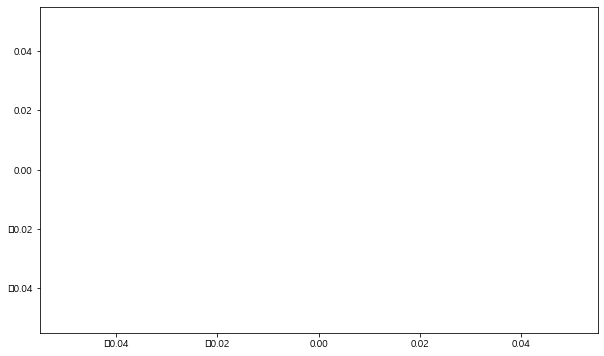

In [190]:
plt.figure(figsize=(10,6))
plt.plot()

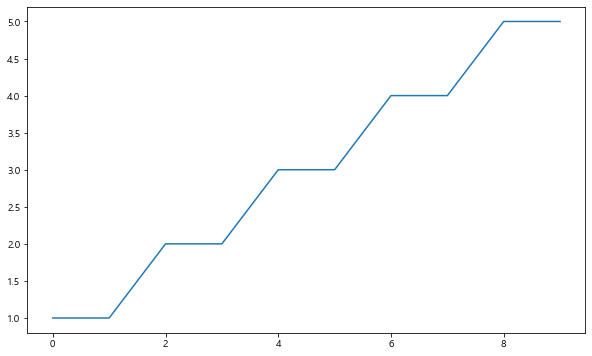

In [188]:
# 빈 도화지 설정 
plt.figure(figsize=(10,6))
plt.plot([0,1,2,3,4,5,6,7,8,9], [1,1,2,2,3,3,4,4,5,5])
plt.show()

### 예제 1:그래프 기초

#### 삼각함수 그리기
- np.arange(a, b, c) a부터 b까지 c간격
- np.sin(value)

In [194]:
import numpy as np 
t = np.arange(0, 12, 0.01)
y = np.sin(t)

C:\Users\dbdud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dbdud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


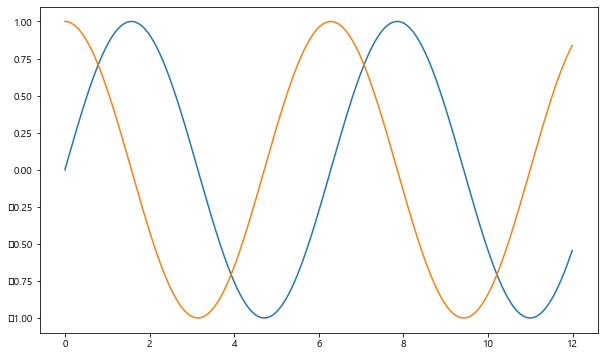

In [196]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.show()

- 격자 무늬 추가
- 전체 그래프 제목
- x축, y축 제목추가
- 주황색 파랑색 그래프 어떤의미 인지 추가

C:\Users\dbdud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dbdud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


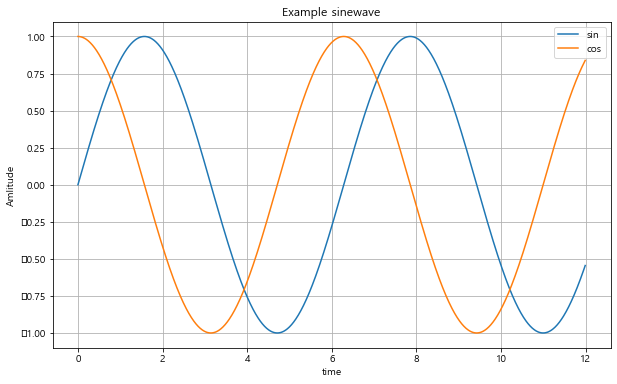

In [205]:
# plt.figure(figsize=(10, 6))
# plt.plot(t, np.sin(t), label = 'sin')
# plt.plot(t, np.cos(t), label = 'cos')
# # 격자무늬 추가
# plt.grid(True)
# #오른쪽 상단에 그래프 이름 
# plt.legend(loc='upper right') # 범례
# # 전체 그래프 제목
# plt.title('Example sinewave')
# #x축 이름 만들어주기
# plt.xlabel('time')
# #y축 이름만들어주기
# plt.ylabel('Amlitude') #진폭
# plt.show()

In [206]:
def drawGraph():
    plt.figure(figsize=(10, 6))
    plt.plot(t, np.sin(t), label = 'sin')
    plt.plot(t, np.cos(t), label = 'cos')
    # 격자무늬 추가
    plt.grid(True)
    #오른쪽 상단에 그래프 이름 
    plt.legend(loc='upper right') # 범례
    # 전체 그래프 제목
    plt.title('Example sinewave')
    #x축 이름 만들어주기
    plt.xlabel('time')
    #y축 이름만들어주기
    plt.ylabel('Amlitude') #진폭
    plt.show()

C:\Users\dbdud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dbdud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


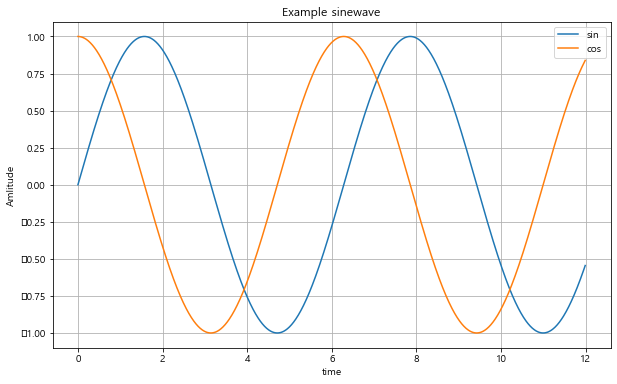

In [207]:
drawGraph()

### 예제2: 그래프 커스텀

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
t = np.arange(0, 5, 0.5)

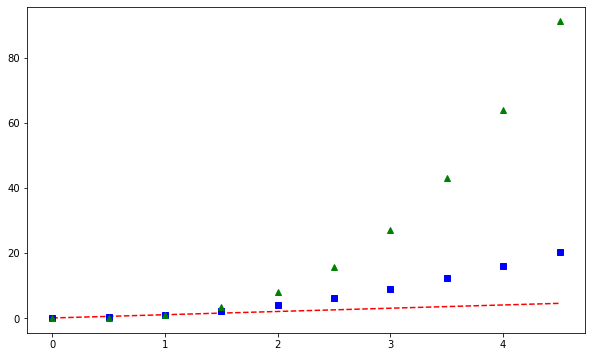

In [9]:

plt.figure(figsize=(10,6))
plt.plot(t, t, "r--") # 빨간색 r 점선형태로 선을 그려라 r -- 
plt.plot(t, t**2, 'bs')# 
plt.plot(t, t**3, 'g^')
plt.show()

In [13]:
# t = [0, 1, 2, 3, 4, 5, 6]
t = list(range(0, 7))
y = [1, 4, 5,8, 9, 3, 2]

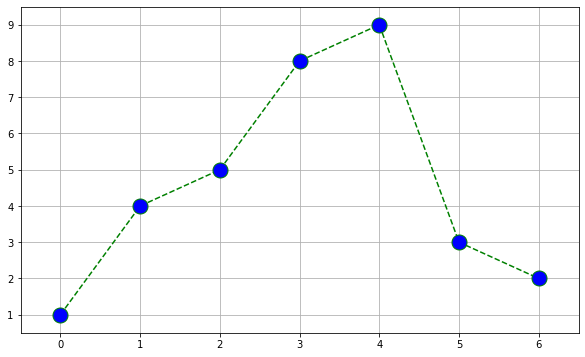

In [15]:
plt.figure(figsize=(10,6))
plt.plot(
    t,
    y,
    color = 'green', # 색이 초록색 모양으로 나옴 
    linestyle='dashed', # 점선 형태로
    marker='o', # 마커는 동그라미 모양
    markerfacecolor='blue', #마커 색은 파랑색
    markersize=15
)
# x 축 범위 xc축 끝이 6.5로 변한다 
plt.xlim([-0.5, 6.5]) # 
# 
plt.ylim([0.5, 9.5])
plt.grid()
plt.show()

In [224]:
def drawGraphs():
    plt.figure(figsize=(10,6))
    plt.plot(
        t,
        y,
        color = 'blue', # 색이 초록색 모양으로 나옴 
        linestyle='dashed', # 점선 형태로
        marker='o', # 마커는 동그라미 모양
        markerfacecolor='blue', #마커 색은 파랑색
        markersize=15
    )
    # x 축 범위 xc축 끝이 6.5로 변한다 
    plt.xlim([-0.5, 6.5]) # 
    # 
    plt.ylim([0.5, 9.5])
    plt.grid()
    plt.show()

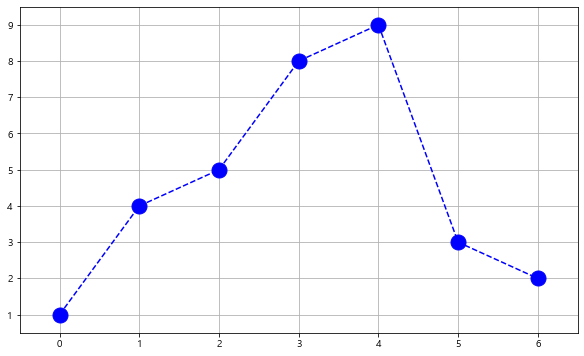

In [225]:
drawGraphs()

### scatter plot


In [242]:
t = np.array([range(0,10)])
y = np.array([range(0,10)])

In [243]:
t

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [244]:
y

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

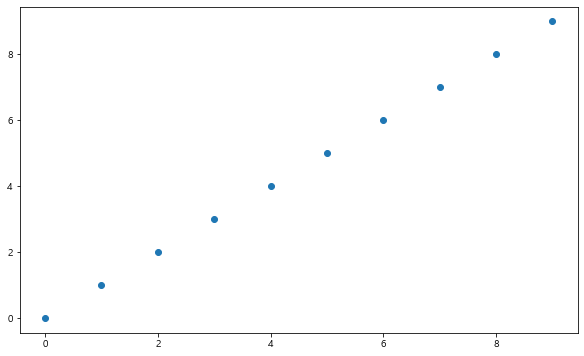

In [245]:
plt.figure(figsize=(10, 6))
plt.scatter(t,y)
plt.show()

In [259]:
def scatterdrawgraph():
    plt.figure(figsize=(20, 6))
    plt.scatter(t,y)
    plt.show()

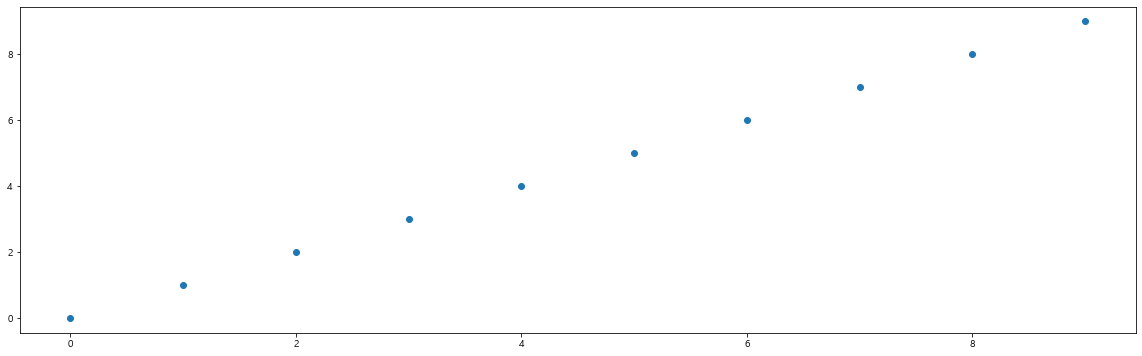

In [260]:
scatterdrawgraph()

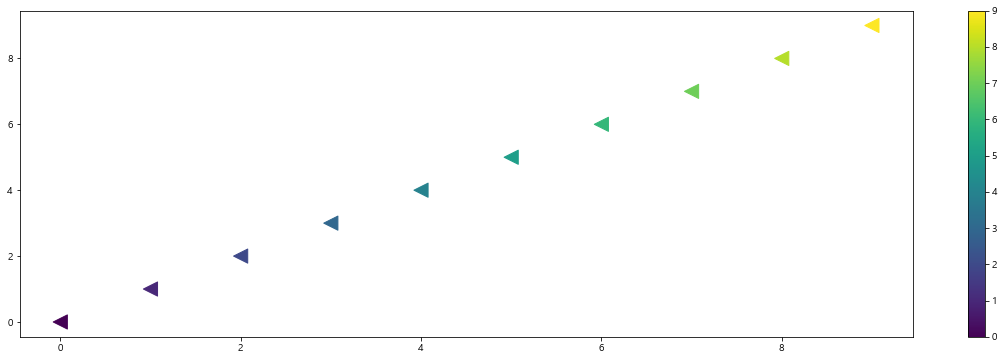

In [261]:
colormap=t
def scatterdrawgraph1():
    plt.figure(figsize=(20, 6))
    # s는 마커 크기
    plt.scatter(t,y, s=200, c=colormap, marker='<')
    plt.colorbar()
    plt.show()
scatterdrawgraph1()

#### 예제 4: pandas plot그리기 
- matplotlib을 가져와서 사용한다.

In [263]:
dataResult.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


<AxesSubplot:>

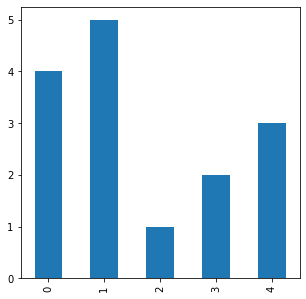

In [10]:
import matplotlib.pyplot as plt 
import pandas as pd
x_data = pd.DataFrame({
    'A': [4, 5, 1, 2,3],
    "B": ['a', 'b', 'c', 'd', 'e']
})
x_data['A'].plot(kind='bar', figsize=(5,5))

<AxesSubplot:ylabel='구별'>

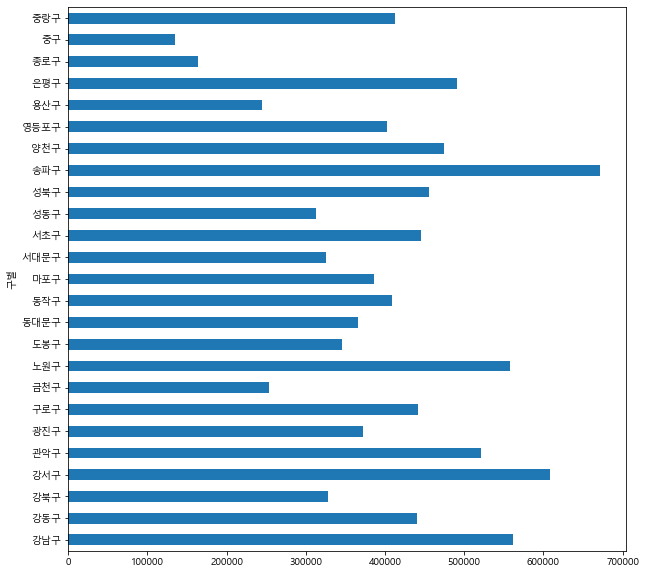

In [266]:
# kind 우리가 원하는 모양
# bar 세로막대 barh가로막대
dataResult['인구수'].plot(kind="barh", figsize=(10,10))